In [836]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm

In [837]:
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 500
mpl.rcParams['font.family']= 'Arial'

In [838]:
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats

#my_colormap = LinearSegmentedColormap.from_list("", [ "darkred","white"])
my_colormap = LinearSegmentedColormap.from_list("", ['darkred',"white", "lightsalmon"])
my_colormap1 = LinearSegmentedColormap.from_list("", ['#735c12',"white", "#922b05"])
my_colormap2 = LinearSegmentedColormap.from_list("", ['steelblue',"white", "darkred"])

In [839]:
color_dict = {
'Adenoviridae':'#007440',
'Herpesviridae':'#789C49',
'Papillomaviridae':'#5AA987',
'Polyomaviridae':'#ACC532',
'Poxviridae':'#B8C98D',
'Reoviridae':'#E8DB00',
'Anelloviridae':'#F5D19E',
'Parvoviridae':'#93583A',
'Retroviridae':'#919191',
'Caliciviridae':'#496E93',
'Coronaviridae':'#9DCAE6',
'Flaviviridae':'#BFCBF1',
'Hepeviridae':'#8080EB',
'Picornaviridae':'#7D89C1',
'Togaviridae':'#47499C',
'Bornaviridae':'#522B55',
'Filoviridae':'#955B8E',
'Kolmioviridae':'#AA97BC',
'Orthomyxoviridae':'#F6E2DC',
'Paramyxoviridae':'#F4C8C5',
'Phenuiviridae':'#E48180',
'Pneumoviridae':'#C24F4F',
'Rhabdoviridae':'#8A292D',
'palegreen':'palegreen',
'darkorange':'darkorange',
'black':'black',
'white':'white',
'yellow':'yellow',
'red':'red',
'cyan':'cyan',
'purple':'purple'
}

all_colors = list(color_dict.values())

colors_dict = dict(zip(list(range(30)),all_colors))

In [840]:
SAVE_ROOT = '../PSGAT/INTEGRATE_ProSE80d_pos1neg1/'
preds = pd.read_pickle(f'{SAVE_ROOT}preds.pkl')
genes = pd.read_pickle(f'{SAVE_ROOT}genes.pkl')

In [841]:
genename_to_uniprot = pd.read_pickle("../data/HUMAN_9606_idmapping_genename.pkl")
genename_to_uniprot_integrate = genename_to_uniprot.set_index(['Uniprot']).loc[list(set(genes)&set(genename_to_uniprot['Uniprot'].tolist())),:].reset_index()

genename_to_uniprot_dict = genename_to_uniprot_integrate.set_index(['ID']).to_dict()['Uniprot']
uniprot_to_genename_dict = genename_to_uniprot_integrate.set_index(['Uniprot']).to_dict()['ID']

In [842]:
llps_scores = pd.read_pickle("../data/HUMAN_9606_PhaSePred_SaPS_PdPS.pkl")
llps_scores.head(2)
llps_dict = llps_scores.set_index(['entry']).to_dict()

In [843]:
entry2pdps_dict = llps_scores.set_index('entry').to_dict()['PdPS-10fea']
entry2saps_dict = llps_scores.set_index('entry').to_dict()['SaPS-10fea']

In [844]:
integrate = pd.read_csv("../data/Interactome-Datasets/integrate.csv")
integrate.head(2)

A       B
0  Q9H2S6  Q9NPE6
1  Q9H2S6  Q9BXK5

# Read Enrichment results

In [ ]:
cluster_features_enrich = pd.read_pickle("/home/lyz/PhaSepGAT/saves/INTEGRATE_ProSE80d_pos1neg1/PS_clusters_allfeature_enrichment.pkl")
cluster_features_enrich.head(1)

Cluster  Size  Density  Internal weight  External weight  Quality  \
0        1    31   0.3021            140.5            758.1   0.1463   

    P-value                                            Members  \
0  0.999874  Q9Y5B9 Q08945 Q96P70 Q9BTT0 P62805 Q01831 P499...   

   FDR PS proteins  Frac PS proteins  ... Frac RHK_IVMALP_deltazscores  \
0         0.001036          0.580645  ...                     0.064516   

  Frac RHK_FWY_deltazscores Frac STNQCG_IVMALP_deltazscores  \
0                  0.193548                        0.064516   

   Frac STNQCG_FWY_deltazscores  Frac IVMALP_FWY_deltazscores  \
0                      0.064516                      0.032258   

   Frac WT_pos_block  Frac WT_neg_block  Frac WT_all_block  Frac Hydropathy  \
0           0.451613           0.387097           0.354839              0.0   

   Frac NCPR  
0   0.483871  

[1 rows x 5403 columns]

In [914]:
cluster_features_enrich[cluster_features_enrich['Cluster']==2069]

Cluster  Size  Density  Internal weight  External weight  Quality  \
488     2069     4   0.3148            1.889            55.97  0.02868   

      P-value                      Members  FDR PS proteins  Frac PS proteins  \
488  0.903035  Q9BW19 Q86XP3 Q9NPA8 P28324         0.210934              0.75   

     ... Frac RHK_IVMALP_deltazscores Frac RHK_FWY_deltazscores  \
488  ...                         0.25                       0.0   

    Frac STNQCG_IVMALP_deltazscores  Frac STNQCG_FWY_deltazscores  \
488                             0.0                           0.0   

     Frac IVMALP_FWY_deltazscores  Frac WT_pos_block  Frac WT_neg_block  \
488                           0.0                0.0               0.25   

     Frac WT_all_block  Frac Hydropathy  Frac NCPR  
488               0.25              0.0       0.25  

[1 rows x 5403 columns]

In [916]:
[i for i in all_features if cluster_features_enrich.loc[488,'FDR '+i] < 0.05]

['Transcription factor e(y)2']

In [ ]:
[i for i in all_features if cluster_features_enrich.loc[488,'FDR '+i] < 0.05]

In [915]:
all_features = [i.replace('Frac ','') for i in cluster_features_enrich.columns if 'Frac' in i]

In [ ]:
len(all_features)

2695

## Feature that enriched in 493 clusters(domain, motif, aa features)

In [ ]:
sig_features = []
for f in cluster_features_enrich.columns:
    if 'FDR' in f:
        if len(cluster_features_enrich[cluster_features_enrich[f]<0.05]) > 0:
            sig_features.append(f.replace('FDR ',''))

In [ ]:
len(sig_features)

800

In [ ]:
frac_features = []
for f in cluster_features_enrich.columns:
    if 'Frac' in f:
        if len(cluster_features_enrich[cluster_features_enrich[f]>0.5]) > 0:
            frac_features.append(f.replace('Frac ',''))

In [ ]:
len(frac_features)

96

In [ ]:
feature_specific = [i for i in all_features if i in sig_features+frac_features]

In [ ]:
len(feature_specific)

810

In [ ]:
feature_specific_enrich_count = pd.DataFrame(index=feature_specific,columns = ['Count','Fraction','Clusters'])

for f in feature_specific_enrich_count.index:
    if 'FDR '+f in cluster_features_enrich.columns:
        f_rep1 = 'FDR '+f
        f_rep2 = 'Frac '+f
    else:
        f_rep1 = 'Cluster'
        f_rep2 = 'Cluster'
        
    if f_rep1 != 'Cluster':
        feature_specific_enrich_count.loc[f,'Count'] = len(cluster_features_enrich[(cluster_features_enrich[f_rep1]<0.05)|(cluster_features_enrich[f_rep2]>0.5)])
        feature_specific_enrich_count.loc[f,'Fraction'] = len(cluster_features_enrich[(cluster_features_enrich[f_rep1]<0.05)|(cluster_features_enrich[f_rep2]>0.5)])/len(cluster_features_enrich)
        feature_specific_enrich_count.loc[f,'Clusters'] = cluster_features_enrich[(cluster_features_enrich[f_rep1]<0.05)|(cluster_features_enrich[f_rep2]>0.5)]['Cluster'].tolist()
    else:
        feature_specific_enrich_count.loc[f,'Count'] = 0
        feature_specific_enrich_count.loc[f,'Fraction'] = 0
        feature_specific_enrich_count.loc[f,'Clusters'] = 0

In [ ]:
feature_consider = feature_specific_enrich_count[feature_specific_enrich_count['Count']>=5].iloc[1:]
feature_consider

Count  Fraction  \
14-3-3 protein                               8  0.016227   
AAA domain                                   7  0.014199   
AF-4 proto-oncoprotein N-terminal region     5  0.010142   
AF4 interaction motif                        5  0.010142   
AFF4, C-terminal homology domain             5  0.010142   
...                                        ...       ...   
WT_pos_block                                31   0.06288   
WT_neg_block                                37  0.075051   
WT_all_block                                48  0.097363   
Hydropathy                                   8  0.016227   
NCPR                                        19   0.03854   

                                                                                   Clusters  
14-3-3 protein                              [100, 1632, 1734, 1811, 1890, 1895, 2032, 2040]  
AAA domain                                             [86, 171, 536, 785, 838, 1504, 1887]  
AF-4 proto-oncoprotein N-terminal region                             [15, 32, 37, 482, 730]  
AF4 interaction motif                                                [15, 32, 37, 482, 730]  
AFF4, C-terminal homology domain                                     [15, 32, 37, 482, 730]  
...                                                                                     ...  
WT_pos_block                              [1, 15, 18, 37, 44, 60, 67, 86, 92, 171, 277, ...  
WT_neg_block                              [1, 13, 18, 44, 53, 67, 86, 92, 171, 277, 441,...  
WT_all_block                              [1, 13, 15, 18, 22, 32, 34, 37, 44, 53, 67, 86...  
Hydropathy                                     [41, 119, 281, 1109, 1158, 1260, 1562, 1866]  
NCPR                                      [1, 18, 60, 67, 86, 171, 229, 277, 420, 510, 5...  

[148 rows x 3 columns]

In [ ]:
list(feature_consider.index)

['14-3-3 protein',
 'AAA domain',
 'AF-4 proto-oncoprotein N-terminal region',
 'AF4 interaction motif',
 'AFF4, C-terminal homology domain',
 'ANC1 homology domain (AHD)',
 'Ankyrin repeats (3 copies)',
 'Armadillo/beta-catenin-like repeat',
 'Autism susceptibility gene 2 protein',
 'Bromodomain',
 'C-terminus of histone H2A',
 'C2 domain',
 'COMPASS (Complex proteins associated with Set1p) component N',
 'Cadherin domain',
 'Calponin homology (CH) domain',
 'Chromo (CHRromatin Organisation MOdifier) domain',
 'Collagen triple helix repeat (20 copies)',
 'Core histone H2A/H2B/H3/H4',
 'DEAD/DEAH box helicase',
 'Double-stranded RNA binding motif',
 'ELM2 domain',
 'FF domain',
 'Helicase conserved C-terminal domain',
 'Histidine phosphatase superfamily (branch 1)',
 'Histone chaperone Rttp106-like, middle domain',
 'Intermediate filament protein',
 'KH domain',
 'Keratin type II head',
 'LIM domain',
 'LSM domain',
 'MAPK-interacting and spindle-stabilising protein-like',
 'Myb-like D

In [ ]:

len(['14-3-3 protein',
 'AAA domain',
 'AF-4 proto-oncoprotein N-terminal region',
 'AF4 interaction motif',
 'AFF4, C-terminal homology domain',
 'ANC1 homology domain (AHD)',
 'Ankyrin repeats (3 copies)',
 'Armadillo/beta-catenin-like repeat',
 'Autism susceptibility gene 2 protein',
 'Bromodomain',
 'C-terminus of histone H2A',
 'C2 domain',
 'COMPASS (Complex proteins associated with Set1p) component N',
 'Cadherin domain',
 'Calponin homology (CH) domain',
 'Chromo (CHRromatin Organisation MOdifier) domain',
 'Collagen triple helix repeat (20 copies)',
 'Core histone H2A/H2B/H3/H4',
 'DEAD/DEAH box helicase',
 'Double-stranded RNA binding motif',
 'ELM2 domain',
 'FF domain',
 'Helicase conserved C-terminal domain',
 'Histidine phosphatase superfamily (branch 1)',
 'Histone chaperone Rttp106-like, middle domain',
 'Intermediate filament protein',
 'KH domain',
 'Keratin type II head',
 'LIM domain',
 'LSM domain',
 'MAPK-interacting and spindle-stabilising protein-like',
 'Myb-like DNA-binding domain',
 'Myosin head (motor domain)',
 'Myosin tail',
 'Novel AID APOBEC clade 2',
 'Occludin homology domain',
 'PBZ domain',
 'PDZ domain',
 'PH domain',
 'PHD-finger',
 'PHD-zinc-finger like domain',
 'Protein kinase domain',
 'RAWUL domain RING finger- and  WD40-associated ubiquitin-like',
 'RNA polymerase II elongation factor ELL',
 'RNA recognition motif',
 'Regulator of chromosome condensation (RCC1) repeat',
 'SAM domain (Sterile alpha motif)',
 'SAP domain',
 'SET domain',
 'SH2 domain',
 'SH3 domain',
 'Sec63 Brl domain',
 'Spectrin repeat',
 'Surp module',
 'Tubulin C-terminal domain',
 'Tubulin/FtsZ family, GTPase domain',
 'Variant SH3 domain',
 'WD domain, G-beta repeat',
 'WH1 domain',
 'WH2 motif',
 'YEATS family',
 'Yaf2/RYBP C-terminal binding motif',
 'Zinc finger C-x8-C-x5-C-x3-H type (and similar)',
 'Zinc finger, C2H2 type',
 'Zinc finger, C3HC4 type (RING finger)',
 'Zn-finger in Ran binding protein and others',
 'mbt repeat'])

67

In [ ]:
len(['CLV_PCSK_FUR_1',
 'CLV_PCSK_PC7_1',
 'DEG_Kelch_KLHL12_1',
 'DEG_Kelch_KLHL3_1',
 'DEG_SCF_COI1_1',
 'DOC_PP4_MxPP_1',
 'DOC_USP7_UBL2_3',
 'LIG_CNOT1_NIM_1',
 'LIG_EH_1',
 'LIG_EVH1_2',
 'LIG_HOMEOBOX',
 'LIG_IBS_1',
 'LIG_MYND_1',
 'LIG_PTAP_UEV_1',
 'LIG_RPA_C_Vert',
 'LIG_SH3_PxRPPK_7',
 'LIG_SH3_PxxDY_5',
 'LIG_SH3_PxxPPRxxK_8',
 'LIG_SH3_PxxxRxxKP_6',
 'LIG_TRAF6_MATH_1',
 'LIG_WW_1',
 'LIG_WW_2',
 'LIG_WW_3',
 'LIG_eIF4E_2',
 'MOD_CDC14_SPxK_1',
 'MOD_DYRK1A_RPxSP_1',
 'MOD_LATS_1',
 'MOD_PRMT_GGRGG_1',
 'TRG_DiLeu_BaEn_4'])

29

In [ ]:
len(['D',
 'E',
 'F',
 'G',
 'H',
 'K',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'Y',
 'acid',
 'basic',
 'hydrophilic',
 'aromatic',
 'charged',
 'nu',
 'betaTurn',
 'DE_omegazscores',
 'RHK_omegazscores',
 'DERHK_omegazscores',
 'STNQCG_omegazscores',
 'IVMALP_omegazscores',
 'NQ_omegazscores',
 'SG_omegazscores',
 'SR_omegazscores',
 'A_omegazscores',
 'D_omegazscores',
 'E_omegazscores',
 'G_omegazscores',
 'I_omegazscores',
 'K_omegazscores',
 'P_omegazscores',
 'Q_omegazscores',
 'R_omegazscores',
 'S_omegazscores',
 'T_omegazscores',
 'Y_omegazscores',
 'DE_RHK_deltazscores',
 'DE_STNQCG_deltazscores',
 'DE_IVMALP_deltazscores',
 'DE_FWY_deltazscores',
 'RHK_STNQCG_deltazscores',
 'RHK_IVMALP_deltazscores',
 'STNQCG_IVMALP_deltazscores',
 'IVMALP_FWY_deltazscores',
 'WT_pos_block',
 'WT_neg_block',
 'WT_all_block',
 'Hydropathy',
 'NCPR'])

52

### Clustering of condensates

In [ ]:
cluster_feature_enrich_df = pd.DataFrame(index=cluster_features_enrich['Cluster'].tolist(),columns=feature_consider.index)

In [ ]:
for i in feature_consider.index:
    for j in cluster_features_enrich['Cluster'].tolist():
        if j in feature_consider.loc[i,'Clusters']:
            cluster_feature_enrich_df.loc[j,i]=1
        else:
            cluster_feature_enrich_df.loc[j,i]=0

In [ ]:
cluster_feature_corr = cluster_feature_enrich_df.T.corr(method='spearman').fillna(0)

In [ ]:
cluster_feature_corr

1         3         5         8         9         11        13    \
1     1.000000  0.030773  0.240772  0.128624  0.240772 -0.060193  0.342997   
3     0.030773  1.000000 -0.029637  0.696631 -0.029637 -0.029637 -0.042220   
5     0.240772 -0.029637  1.000000 -0.020646 -0.014493 -0.014493 -0.020646   
8     0.128624  0.696631 -0.020646  1.000000 -0.020646 -0.020646 -0.029412   
9     0.240772 -0.029637 -0.014493 -0.020646  1.000000 -0.014493 -0.020646   
...        ...       ...       ...       ...       ...       ...       ...   
2069  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2078  0.240772 -0.029637 -0.014493 -0.020646 -0.014493 -0.014493 -0.020646   
2079 -0.060193 -0.029637 -0.014493 -0.020646 -0.014493 -0.014493 -0.020646   
2082 -0.123091  0.204545 -0.029637  0.327205 -0.029637 -0.029637 -0.042220   
2088  0.342997 -0.042220 -0.020646 -0.029412 -0.020646 -0.020646  0.485294   

          15        18        22    ...      2056  2059  2064      2065  2068  \
1     0.021339  0.685828  0.184637  ...  0.416025   0.0   0.0 -0.060193   0.0   
3     0.089308 -0.026861 -0.060606  ...  0.170697   0.0   0.0 -0.029637   0.0   
5    -0.046241  0.183892 -0.029637  ... -0.033389   0.0   0.0 -0.014493   0.0   
8    -0.065874  0.074848 -0.042220  ...  0.285391   0.0   0.0 -0.020646   0.0   
9    -0.046241  0.183892  0.489010  ... -0.033389   0.0   0.0 -0.014493   0.0   
...        ...       ...       ...  ...       ...   ...   ...       ...   ...   
2069  0.000000  0.000000  0.000000  ...  0.000000   0.0   0.0  0.000000   0.0   
2078  0.313415  0.183892 -0.029637  ... -0.033389   0.0   0.0 -0.014493   0.0   
2079 -0.046241  0.183892 -0.029637  ... -0.033389   0.0   0.0 -0.014493   0.0   
2082  0.089308 -0.026861 -0.060606  ... -0.068279   0.0   0.0 -0.029637   0.0   
2088 -0.065874  0.261968 -0.042220  ...  0.285391   0.0   0.0 -0.020646   0.0   

      2069      2078      2079      2082      2088  
1      0.0  0.240772 -0.060193 -0.123091  0.342997  
3      0.0 -0.029637 -0.029637  0.204545 -0.042220  
5      0.0 -0.014493 -0.014493 -0.029637 -0.020646  
8      0.0 -0.020646 -0.020646  0.327205 -0.029412  
9      0.0 -0.014493 -0.014493 -0.029637 -0.020646  
...    ...       ...       ...       ...       ...  
2069   0.0  0.000000  0.000000  0.000000  0.000000  
2078   0.0  1.000000 -0.014493 -0.029637 -0.020646  
2079   0.0 -0.014493  1.000000 -0.029637 -0.020646  
2082   0.0 -0.029637 -0.029637  1.000000 -0.042220  
2088   0.0 -0.020646 -0.020646 -0.042220  1.000000  

[493 rows x 493 columns]

In [ ]:
cluster_feature_corr  = cluster_feature_enrich_df.T.corr().fillna(0)
cluster_feature_corr  = cluster_feature_corr.loc[:, (cluster_feature_corr != 0).any(axis=0)]
cluster_feature_corr  = cluster_feature_corr.loc[cluster_feature_corr.columns, :]

In [ ]:
len(cluster_feature_corr)

401

In [ ]:
cluster_feature_corr = cluster_feature_corr.loc[:, (cluster_feature_corr != 0).any(axis=0)]
cluster_feature_corr

1         3         5         8         9         11        13    \
1     1.000000  0.030773  0.240772  0.128624  0.240772 -0.060193  0.342997   
3     0.030773  1.000000 -0.029637  0.696631 -0.029637 -0.029637 -0.042220   
5     0.240772 -0.029637  1.000000 -0.020646 -0.014493 -0.014493 -0.020646   
8     0.128624  0.696631 -0.020646  1.000000 -0.020646 -0.020646 -0.029412   
9     0.240772 -0.029637 -0.014493 -0.020646  1.000000 -0.014493 -0.020646   
...        ...       ...       ...       ...       ...       ...       ...   
2069  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2078  0.240772 -0.029637 -0.014493 -0.020646 -0.014493 -0.014493 -0.020646   
2079 -0.060193 -0.029637 -0.014493 -0.020646 -0.014493 -0.014493 -0.020646   
2082 -0.123091  0.204545 -0.029637  0.327205 -0.029637 -0.029637 -0.042220   
2088  0.342997 -0.042220 -0.020646 -0.029412 -0.020646 -0.020646  0.485294   

          15        18        22    ...      2002      2008      2015  \
1     0.021339  0.685828  0.184637  ... -0.105802 -0.060193  0.234734   
3     0.089308 -0.026861 -0.060606  ... -0.052093 -0.029637  0.089308   
5    -0.046241  0.183892 -0.029637  ... -0.025474 -0.014493 -0.046241   
8    -0.065874  0.074848 -0.042220  ... -0.036290 -0.020646  0.190304   
9    -0.046241  0.183892  0.489010  ... -0.025474 -0.014493 -0.046241   
...        ...       ...       ...  ...       ...       ...       ...   
2069  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2078  0.313415  0.183892 -0.029637  ... -0.025474 -0.014493  0.313415   
2079 -0.046241  0.183892 -0.029637  ... -0.025474 -0.014493 -0.046241   
2082  0.089308 -0.026861 -0.060606  ...  0.251784 -0.029637  0.089308   
2088 -0.065874  0.261968 -0.042220  ... -0.036290 -0.020646 -0.065874   

          2033      2056      2065      2078      2079      2082      2088  
1     0.070535  0.416025 -0.060193  0.240772 -0.060193 -0.123091  0.342997  
3    -0.052093  0.170697 -0.029637 -0.029637 -0.029637  0.204545 -0.042220  
5    -0.025474 -0.033389 -0.014493 -0.014493 -0.014493 -0.029637 -0.020646  
8    -0.036290  0.285391 -0.020646 -0.020646 -0.020646  0.327205 -0.029412  
9    -0.025474 -0.033389 -0.014493 -0.014493 -0.014493 -0.029637 -0.020646  
...        ...       ...       ...       ...       ...       ...       ...  
2069  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2078 -0.025474 -0.033389 -0.014493  1.000000 -0.014493 -0.029637 -0.020646  
2079 -0.025474 -0.033389 -0.014493 -0.014493  1.000000 -0.029637 -0.020646  
2082  0.251784 -0.068279 -0.029637 -0.029637 -0.029637  1.000000 -0.042220  
2088 -0.036290  0.285391 -0.020646 -0.020646 -0.020646 -0.042220  1.000000  

[493 rows x 225 columns]

In [ ]:
from sklearn.cluster import AgglomerativeClustering

for i in range(20,31):
    model = AgglomerativeClustering(n_clusters=i, 
                                    #metric='minkowski',
                                    #metric='cosine',
                                    #affinity='braycurtis',
                                    #metric='canberra',
                                    #affinity='chebyshev',
                                    #affinity='cityblock',
                                    #metric='correlation',
                                    #affinity='seuclidean',
                                    #affinity='sqeuclidean',
                                    #metric='hamming',
                                    #affinity='kulsinski',
                                    #metric='euclidean',
                                    #affinity='dice',
                                     memory=None, connectivity=None,
                                    compute_full_tree='auto', 
                                    #linkage='ward')
                                    linkage='complete')
                                    #linkage='average')
                                    #linkage='single')

    #labels = model.fit_predict(cluster_feature_enrich_df_plot.loc[:,feature_specific].fillna(0).values)
    #cluster_feature_enrich_df_plot[f'Complete_{i}'] = labels
#euclidean

    labels = model.fit_predict(cluster_feature_corr.loc[:,cluster_feature_corr.index].values)
    cluster_feature_corr[f'Complete_{i}'] = labels

In [ ]:
cluster_feature_corr_color = [colors_dict[i] for i in cluster_feature_corr['Complete_27'].tolist()]
cluster_feature_corr_color

['#496E93',
 '#789C49',
 '#F4C8C5',
 'palegreen',
 '#007440',
 '#955B8E',
 '#496E93',
 'black',
 '#47499C',
 '#496E93',
 '#5AA987',
 '#ACC532',
 '#5AA987',
 '#789C49',
 '#ACC532',
 'black',
 '#789C49',
 '#496E93',
 'black',
 '#AA97BC',
 '#7D89C1',
 '#F5D19E',
 '#E48180',
 '#F5D19E',
 'darkorange',
 '#F4C8C5',
 '#ACC532',
 '#F5D19E',
 '#007440',
 '#007440',
 '#8080EB',
 '#496E93',
 '#47499C',
 '#5AA987',
 '#8080EB',
 '#007440',
 '#919191',
 '#8080EB',
 '#496E93',
 'darkorange',
 '#E48180',
 '#F5D19E',
 '#8080EB',
 '#8080EB',
 '#ACC532',
 '#E8DB00',
 '#F4C8C5',
 '#789C49',
 '#E48180',
 '#BFCBF1',
 '#007440',
 '#919191',
 '#ACC532',
 '#007440',
 '#9DCAE6',
 '#B8C98D',
 '#8080EB',
 '#F6E2DC',
 '#789C49',
 '#E8DB00',
 '#C24F4F',
 '#F6E2DC',
 '#C24F4F',
 '#F6E2DC',
 '#8080EB',
 '#B8C98D',
 '#5AA987',
 '#8080EB',
 '#F5D19E',
 '#47499C',
 '#93583A',
 '#F5D19E',
 '#7D89C1',
 '#789C49',
 '#BFCBF1',
 'palegreen',
 '#F5D19E',
 '#ACC532',
 '#AA97BC',
 '#BFCBF1',
 '#47499C',
 '#522B55',
 '#F5D19E',


In [ ]:
sns.clustermap(
    cluster_feature_corr.loc[:,cluster_feature_corr.index],
    #cluster_feature_enrich_df_plot.loc[:,feature_specific].fillna(0),
#               vmin=-1,vmax=1,center=0,           
              vmin=-0.5,vmax=0.5,center=0,
               cmap=my_colormap1 ,
               row_colors = cluster_feature_corr_color,
               #linewidths=0.8,
               linecolor='white',
               #method='ward', 
               method='complete', 
               #method='average',
               #col_cluster=False,
               #method='single',
               
               #metric='euclidean'
               #metric='sqeuclidean'
               #metric='seuclidean'
               #metric='cosine',
               #metric='minkowski'
               #metric='braycurtis'
               #metric='canberra',
               #metric='chebyshev'
               #metric='cityblock'
               #metric='correlation',
               #metric='hamming'
               #metric='kulsinski'
               #metric='dice',
               figsize=(30,30)

               )


d:\conda\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
d:\conda\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [ ]:
condensate_type_dict = cluster_feature_corr.to_dict()[f'Complete_27']
cluster_feature_enrich_df[f'type_27'] = cluster_feature_enrich_df.index.map(condensate_type_dict)

In [ ]:
cluster_feature_enrich_df['cluster'] = cluster_feature_enrich_df.index

In [ ]:
cluster_feature_enrich_df.index = cluster_features_enrich['Label'].tolist()

In [ ]:
cluster_feature_enrich_df.to_pickle("./cluster_allfeature.pkl")

## AA features that enriched in 493 clusters

In [ ]:
cluster_features_enrich = pd.read_pickle("E:/lyz_PhaGAT/代码整理/Fig6/PS_clusters_allfeature_enrichment.pkl")
cluster_features_enrich.head(1)

Cluster  Size  Density  Internal weight  External weight  Quality  \
0        1    31   0.3021            140.5            758.1   0.1463   

    P-value                                            Members  \
0  0.999874  Q9Y5B9 Q08945 Q96P70 Q9BTT0 P62805 Q01831 P499...   

   FDR PS proteins  Frac PS proteins  ... Frac RHK_IVMALP_deltazscores  \
0         0.001036          0.580645  ...                     0.064516   

  Frac RHK_FWY_deltazscores Frac STNQCG_IVMALP_deltazscores  \
0                  0.193548                        0.064516   

   Frac STNQCG_FWY_deltazscores  Frac IVMALP_FWY_deltazscores  \
0                      0.064516                      0.032258   

   Frac WT_pos_block  Frac WT_neg_block  Frac WT_all_block  Frac Hydropathy  \
0           0.451613           0.387097           0.354839              0.0   

   Frac NCPR  
0   0.483871  

[1 rows x 5403 columns]

In [ ]:
feature_specific_enrich_count = pd.DataFrame(index=feature_specific,columns = ['Count','Fraction','Clusters'])

for f in feature_specific_enrich_count.index:
    if 'FDR '+f in cluster_features_enrich.columns:
        f_rep1 = 'FDR '+f
        f_rep2 = 'Frac '+f
    else:
        f_rep1 = 'Cluster'
        f_rep2 = 'Cluster'
        
    if f_rep1 != 'Cluster':
        feature_specific_enrich_count.loc[f,'Count'] = len(cluster_features_enrich[(cluster_features_enrich[f_rep1]<0.05)|(cluster_features_enrich[f_rep2]>0.5)])
        feature_specific_enrich_count.loc[f,'Fraction'] = len(cluster_features_enrich[(cluster_features_enrich[f_rep1]<0.05)|(cluster_features_enrich[f_rep2]>0.5)])/len(cluster_features_enrich)
        feature_specific_enrich_count.loc[f,'Clusters'] = cluster_features_enrich[(cluster_features_enrich[f_rep1]<0.05)|(cluster_features_enrich[f_rep2]>0.5)]['Cluster'].tolist()
    else:
        feature_specific_enrich_count.loc[f,'Count'] = 0
        feature_specific_enrich_count.loc[f,'Fraction'] = 0
        feature_specific_enrich_count.loc[f,'Clusters'] = 0

In [ ]:
feature_consider = feature_specific_enrich_count[feature_specific_enrich_count['Count']>=1].iloc[1:]
feature_consider

Count  Fraction  \
'Cold-shock' DNA-binding domain                        1  0.002028   
14-3-3 protein                                         8  0.016227   
3' exoribonuclease family, domain 1                    2  0.004057   
3' exoribonuclease family, domain 2                    2  0.004057   
3-beta hydroxysteroid dehydrogenase/isomerase f...     2  0.004057   
...                                                  ...       ...   
WT_pos_block                                          31   0.06288   
WT_neg_block                                          37  0.075051   
WT_all_block                                          48  0.097363   
Hydropathy                                             8  0.016227   
NCPR                                                  19   0.03854   

                                                                                             Clusters  
'Cold-shock' DNA-binding domain                                                                  [18]  
14-3-3 protein                                        [100, 1632, 1734, 1811, 1890, 1895, 2032, 2040]  
3' exoribonuclease family, domain 1                                                        [679, 775]  
3' exoribonuclease family, domain 2                                                        [679, 775]  
3-beta hydroxysteroid dehydrogenase/isomerase f...                                          [5, 1587]  
...                                                                                               ...  
WT_pos_block                                        [1, 15, 18, 37, 44, 60, 67, 86, 92, 171, 277, ...  
WT_neg_block                                        [1, 13, 18, 44, 53, 67, 86, 92, 171, 277, 441,...  
WT_all_block                                        [1, 13, 15, 18, 22, 32, 34, 37, 44, 53, 67, 86...  
Hydropathy                                               [41, 119, 281, 1109, 1158, 1260, 1562, 1866]  
NCPR                                                [1, 18, 60, 67, 86, 171, 229, 277, 420, 510, 5...  

[809 rows x 3 columns]

In [ ]:
plot_features = ['A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y',
 'acid',
 'basic',
 'nonpolar',
 'hydrophilic',
 'aromatic',
 'charged',
 'nu',
 'betaTurn',
 'DE_omegazscores',
 'RHK_omegazscores',
 'DERHK_omegazscores',
 'STNQCG_omegazscores',
 'IVMALP_omegazscores',
 'FWY_omegazscores',
 'NQ_omegazscores',
 'SG_omegazscores',
 'SR_omegazscores',
 'A_omegazscores',
 'D_omegazscores',
 'E_omegazscores',
 'F_omegazscores',
 'G_omegazscores',
 'H_omegazscores',
 'I_omegazscores',
 'K_omegazscores',
 'L_omegazscores',
 'M_omegazscores',
 'N_omegazscores',
 'P_omegazscores',
 'Q_omegazscores',
 'R_omegazscores',
 'S_omegazscores',
 'T_omegazscores',
 'V_omegazscores',
 'W_omegazscores',
 'Y_omegazscores',
 'DE_RHK_deltazscores',
 'DE_STNQCG_deltazscores',
 'DE_IVMALP_deltazscores',
 'DE_FWY_deltazscores',
 'RHK_STNQCG_deltazscores',
 'RHK_IVMALP_deltazscores',
 'RHK_FWY_deltazscores',
 'STNQCG_IVMALP_deltazscores',
 'STNQCG_FWY_deltazscores',
 'IVMALP_FWY_deltazscores',
 'WT_pos_block',
 'WT_neg_block',
 'WT_all_block',
 'Hydropathy',
 'NCPR']

In [ ]:
feature_consider = feature_consider.loc[plot_features,:]

## 聚类和凝聚体类别划分

In [ ]:
cluster_feature_enrich_df = pd.DataFrame(index=cluster_features_enrich['Cluster'].tolist(),columns=feature_consider.index)

In [ ]:
for i in feature_consider.index:
    for j in cluster_features_enrich['Cluster'].tolist():
        if j in feature_consider.loc[i,'Clusters']:
            cluster_feature_enrich_df.loc[j,i]=1
        else:
            cluster_feature_enrich_df.loc[j,i]=0

In [ ]:
from scipy import stats

In [ ]:
cluster_feature_spearman = cluster_feature_enrich_df.T.corr(method='spearman').fillna(0)
cluster_feature_spearman = cluster_feature_spearman.loc[:, (cluster_feature_spearman != 0).any(axis=0)]
cluster_feature_spearman = cluster_feature_spearman.loc[cluster_feature_spearman.columns, :]

In [ ]:
cluster_feature_spearman

1         3         5         8         9         11        13    \
1     1.000000  0.030773  0.240772  0.128624  0.240772 -0.060193  0.342997   
3     0.030773  1.000000 -0.029637  0.696631 -0.029637 -0.029637 -0.042220   
5     0.240772 -0.029637  1.000000 -0.020646 -0.014493 -0.014493 -0.020646   
8     0.128624  0.696631 -0.020646  1.000000 -0.020646 -0.020646 -0.029412   
9     0.240772 -0.029637 -0.014493 -0.020646  1.000000 -0.014493 -0.020646   
...        ...       ...       ...       ...       ...       ...       ...   
2065 -0.060193 -0.029637 -0.014493 -0.020646 -0.014493 -0.014493 -0.020646   
2078  0.240772 -0.029637 -0.014493 -0.020646 -0.014493 -0.014493 -0.020646   
2079 -0.060193 -0.029637 -0.014493 -0.020646 -0.014493 -0.014493 -0.020646   
2082 -0.123091  0.204545 -0.029637  0.327205 -0.029637 -0.029637 -0.042220   
2088  0.342997 -0.042220 -0.020646 -0.029412 -0.020646 -0.020646  0.485294   

          15        18        22    ...      2002      2008      2015  \
1     0.021339  0.685828  0.184637  ... -0.105802 -0.060193  0.234734   
3     0.089308 -0.026861 -0.060606  ... -0.052093 -0.029637  0.089308   
5    -0.046241  0.183892 -0.029637  ... -0.025474 -0.014493 -0.046241   
8    -0.065874  0.074848 -0.042220  ... -0.036290 -0.020646  0.190304   
9    -0.046241  0.183892  0.489010  ... -0.025474 -0.014493 -0.046241   
...        ...       ...       ...  ...       ...       ...       ...   
2065 -0.046241 -0.078811 -0.029637  ... -0.025474 -0.014493 -0.046241   
2078  0.313415  0.183892 -0.029637  ... -0.025474 -0.014493  0.313415   
2079 -0.046241  0.183892 -0.029637  ... -0.025474 -0.014493 -0.046241   
2082  0.089308 -0.026861 -0.060606  ...  0.251784 -0.029637  0.089308   
2088 -0.065874  0.261968 -0.042220  ... -0.036290 -0.020646 -0.065874   

          2033      2056      2065      2078      2079      2082      2088  
1     0.070535  0.416025 -0.060193  0.240772 -0.060193 -0.123091  0.342997  
3    -0.052093  0.170697 -0.029637 -0.029637 -0.029637  0.204545 -0.042220  
5    -0.025474 -0.033389 -0.014493 -0.014493 -0.014493 -0.029637 -0.020646  
8    -0.036290  0.285391 -0.020646 -0.020646 -0.020646  0.327205 -0.029412  
9    -0.025474 -0.033389 -0.014493 -0.014493 -0.014493 -0.029637 -0.020646  
...        ...       ...       ...       ...       ...       ...       ...  
2065 -0.025474 -0.033389  1.000000 -0.014493 -0.014493 -0.029637 -0.020646  
2078 -0.025474 -0.033389 -0.014493  1.000000 -0.014493 -0.029637 -0.020646  
2079 -0.025474 -0.033389 -0.014493 -0.014493  1.000000 -0.029637 -0.020646  
2082  0.251784 -0.068279 -0.029637 -0.029637 -0.029637  1.000000 -0.042220  
2088 -0.036290  0.285391 -0.020646 -0.020646 -0.020646 -0.042220  1.000000  

[225 rows x 225 columns]

In [ ]:
from sklearn.cluster import AgglomerativeClustering

for i in range(20,30):
    model = AgglomerativeClustering(n_clusters=i, 
                                    #metric='minkowski',
                                    #metric='cosine',
                                    #affinity='braycurtis',
                                    #metric='canberra',
                                    #affinity='chebyshev',
                                    #affinity='cityblock',
                                    #metric='correlation',
                                    #affinity='seuclidean',
                                    #affinity='sqeuclidean',
                                    #metric='hamming',
                                    #affinity='kulsinski',
                                    #metric='euclidean',
                                    #affinity='dice',
                                     memory=None, connectivity=None,
                                    compute_full_tree='auto', 
                                    #linkage='ward')
                                    linkage='complete')
                                    #linkage='average')
                                    #linkage='single')

    #labels = model.fit_predict(cluster_feature_enrich_df_plot.loc[:,feature_specific].fillna(0).values)
    #cluster_feature_enrich_df_plot[f'Complete_{i}'] = labels
#euclidean

    labels = model.fit_predict(cluster_feature_spearman.loc[:,cluster_feature_spearman.index].values)
    cluster_feature_spearman[f'Complete_{i}'] = labels

In [ ]:
cluster_feature_spearman_color = [colors_dict[i] for i in cluster_feature_spearman['Complete_25'].tolist()]
cluster_feature_spearman_color

['#E8DB00',
 '#F6E2DC',
 '#8A292D',
 '#F6E2DC',
 '#BFCBF1',
 '#ACC532',
 '#8080EB',
 '#47499C',
 '#E8DB00',
 '#5AA987',
 '#919191',
 '#E48180',
 '#9DCAE6',
 '#47499C',
 '#AA97BC',
 '#007440',
 '#47499C',
 '#93583A',
 '#522B55',
 '#5AA987',
 '#007440',
 '#9DCAE6',
 '#BFCBF1',
 '#F4C8C5',
 '#5AA987',
 '#BFCBF1',
 '#9DCAE6',
 '#F5D19E',
 '#BFCBF1',
 '#ACC532',
 '#9DCAE6',
 '#5AA987',
 '#5AA987',
 '#522B55',
 '#B8C98D',
 '#789C49',
 'darkorange',
 '#007440',
 '#9DCAE6',
 '#522B55',
 '#C24F4F',
 '#E48180',
 '#522B55',
 '#ACC532',
 '#F5D19E',
 '#AA97BC',
 '#7D89C1',
 '#919191',
 '#F5D19E',
 '#9DCAE6',
 '#F4C8C5',
 'darkorange',
 '#ACC532',
 '#ACC532',
 '#E8DB00',
 '#ACC532',
 '#789C49',
 '#AA97BC',
 '#F5D19E',
 '#522B55',
 '#955B8E',
 '#AA97BC',
 '#ACC532',
 'darkorange',
 'darkorange',
 '#93583A',
 '#5AA987',
 '#F6E2DC',
 '#B8C98D',
 '#522B55',
 '#789C49',
 '#E8DB00',
 '#522B55',
 '#F4C8C5',
 '#ACC532',
 '#9DCAE6',
 '#47499C',
 '#B8C98D',
 '#955B8E',
 '#5AA987',
 '#8A292D',
 '#BFCBF1',
 '#5

In [ ]:
sns.clustermap(
    cluster_feature_spearman.loc[:,cluster_feature_spearman.index],
    #cluster_feature_enrich_df_plot.loc[:,feature_specific].fillna(0),
#               vmin=-1,vmax=1,center=0,           
              vmin=-0.5,vmax=0.5,center=0,
               cmap=my_colormap1 ,
               row_colors = cluster_feature_spearman_color,
               #linewidths=0.8,
               linecolor='white',
               #method='ward', 
               method='complete', 
               #method='average',
               #col_cluster=False,
               #method='single',
               
               #metric='euclidean'
               #metric='sqeuclidean'
               #metric='seuclidean'
               #metric='cosine',
               #metric='minkowski'
               #metric='braycurtis'
               #metric='canberra',
               #metric='chebyshev'
               #metric='cityblock'
               #metric='correlation',
               #metric='hamming'
               #metric='kulsinski'
               #metric='dice',
               figsize=(30,30)

               )

d:\conda\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
d:\conda\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [ ]:
condensate_type_dict = cluster_feature_spearman.to_dict()[f'Complete_25']

In [ ]:
cluster_feature_enrich_df['condensate_type'] = cluster_feature_enrich_df.index.map(condensate_type_dict)
cluster_feature_enrich_df['cluster'] = cluster_feature_enrich_df.index

In [ ]:
cluster_feature_enrich_df.index = cluster_features_enrich['Label'].tolist()

In [ ]:
cluster_feature_enrich_df = cluster_feature_enrich_df.loc[:,list(cluster_feature_enrich_df.columns[-2:])+list(cluster_feature_enrich_df.columns[:-2])]

In [ ]:
cluster_feature_enrich_df.to_pickle("./cluster_IDRfeatures.pkl")

## Plotting of SG-related clusters

In [ ]:
early_clusters = ['HNRNPA2B1(14)','HNRNPA2B1_1(16)','HNRNPA2B1_5(14)','HNRNPA2B1_2(16)','HNRNPA2B1_4(20)','HNRNPA2B1_3(19)','CPSF6(7)','HP1BP3_1(191)','KHDRBS1(9)']
late_clusters = ['EIF4G1(5)','DNAJA4(12)','EIF3G(16)']
innv_clusters = ['USP10(5)','GIGYF2(5)','ATXN2L(6)','SZRD1(12)']
cluster_order  = early_clusters+innv_clusters+late_clusters

In [ ]:
cluster_order = innv_clusters

In [ ]:
#sg_related_feature_enrichment = pd.read_pickle("/home/lyz/PhaSepGAT/saves/INTEGRATE_ProSE80d_pos1neg1/PS_clusters_allfeature_enrichment.pkl").set_index(['Label']).loc[cluster_order,:].reset_index()
sg_related_feature_enrichment = pd.read_pickle("D:/lyz所有代码/PhaSepGAT/saves/INTEGRATE_ProSE80d_pos1neg1/PS_clusters_allfeature_enrichment.pkl").set_index(['Label']).loc[cluster_order,:].reset_index()
sg_related_feature_enrichment

Label  Cluster  Size  Density  Internal weight  External weight  \
0     HNRNPA2B1(14)      308    14   0.3064           27.880           311.90   
1   HNRNPA2B1_1(16)      488    16   0.3041           36.490           287.60   
2   HNRNPA2B1_5(14)     1653    14   0.3022           27.500           234.30   
3   HNRNPA2B1_2(16)      838    16   0.3177           38.130           307.90   
4   HNRNPA2B1_4(20)     1616    20   0.3025           57.480           453.30   
5   HNRNPA2B1_3(19)     1056    19   0.3077           52.620           483.40   
6          CPSF6(7)      948     7   0.3196            6.712           105.40   
7     HP1BP3_1(191)      277   191   0.3000         5444.000          7175.00   
8        KHDRBS1(9)      721     9   0.3039           10.940           178.30   
9          USP10(5)     1110     5   0.3210            3.210            54.53   
10        GIGYF2(5)     1278     5   0.3210            3.210            57.76   
11        ATXN2L(6)      411     6   0.3726            5.589            67.84   
12        SZRD1(12)      719    12   0.3156           20.830           176.80   
13        EIF4G1(5)      984     5   0.3427            3.427            42.48   
14       DNAJA4(12)      590    12   0.3044           20.090           231.40   
15        EIF3G(16)      374    16   0.3598           43.170           198.70   

    Quality   P-value                                            Members  \
0   0.07580  0.999690  Q32P51 P35637 Q86Y13 P31943 P52597 P52272 B1AT...   
1   0.10250  0.999965  Q15424 Q14151 O14979 P35637 P52272 Q13470 P557...   
2   0.09490  0.997642  Q15424 O14979 P35637 P52272 P55795 P22626 P519...   
3   0.10090  0.999987  P49750 P23246 Q15424 Q14151 O14979 P35637 Q928...   
4   0.10440  0.999900  P09651 P23246 Q15424 Q14151 O14979 P35637 Q5T4...   
5   0.09167  0.999959  P09651 Q32P51 Q15424 O14979 P35637 O43347 P319...   
6   0.05323  0.999299   Q8N684 Q8IVL5 O43809 Q92945 Q9HBH9 Q16630 Q8N1G4   
7   0.41870  0.000000  Q53T94 P62829 O43159 P61313 Q68D10 O15479 P608...   
8   0.05279  0.999853  Q99700 O43390 O43143 Q5VWX1 Q9Y5E9 Q07666 O755...   
9   0.04739  0.996692                 Q9UN86 Q13283 Q5TZA2 Q14694 P30566   
10  0.04524  0.996692                 Q13542 Q86W56 O75420 O60573 Q6Y7W6   
11  0.06543  0.989880          Q8NCA5 Q8WWM7 Q99700 Q3MHD2 P00813 Q9BUT9   
12  0.09400  0.998225  O14893 Q9UHI6 P57678 Q8TEQ6 P83369 Q16637 Q8WX...   
13  0.06129  0.969949                 P60842 Q04637 Q14240 P06730 O60516   
14  0.07293  0.999846  O95433 Q96D46 P22314 P41252 P08243 P27708 P078...   
15  0.15760  0.953244  O75821 O15372 P60842 O00303 O15371 Q9Y262 Q7L2...   

    FDR PS proteins  ...  Frac RHK_IVMALP_deltazscores  \
0      6.260171e-04  ...                      0.000000   
1      5.136578e-07  ...                      0.062500   
2      6.260171e-04  ...                      0.000000   
3      1.089069e-08  ...                      0.312500   
4      2.287416e-09  ...                      0.200000   
5      3.207623e-06  ...                      0.052632   
6      8.810641e-02  ...                      0.285714   
7      9.970257e-51  ...                      0.115183   
8      2.109341e-01  ...                      0.000000   
9      3.461064e-01  ...                      0.000000   
10     9.834143e-02  ...                      0.200000   
11     1.952822e-01  ...                      0.166667   
12     8.810641e-02  ...                      0.083333   
13     3.461064e-01  ...                      0.000000   
14     8.810641e-02  ...                      0.000000   
15     4.911401e-02  ...                      0.062500   

   Frac RHK_FWY_deltazscores Frac STNQCG_IVMALP_deltazscores  \
0                   0.000000                        0.000000   
1                   0.125000                        0.187500   
2                   0.071429                        0.142857   
3                   0.187500                        0.375000   
4                   0.100000        

In [ ]:
all_features = [i.replace('Frac ','') for i in cluster_features_enrich.columns if 'Frac' in i]

In [ ]:
sig_features = []
for f in sg_related_feature_enrichment.columns:
    if 'FDR' in f:
        if len(sg_related_feature_enrichment[sg_related_feature_enrichment[f]<0.05]) > 0:
            sig_features.append(f.replace('FDR ',''))

In [ ]:
frac_features = []
for f in cluster_features_enrich.columns:
    if 'Frac' in f:
        if len(sg_related_feature_enrichment[sg_related_feature_enrichment[f]>0.5]) > 0:
            frac_features.append(f.replace('Frac ',''))

In [ ]:
feature_specific = [i for i in all_features if i in sig_features+frac_features]

In [ ]:
len(feature_specific)

101

In [ ]:
feature_specific_enrich_count = pd.DataFrame(index=feature_specific,columns = ['Count','Fraction','Clusters'])

for f in feature_specific_enrich_count.index:
    if 'FDR '+f in cluster_features_enrich.columns:
        f_rep1 = 'FDR '+f
        f_rep2 = 'Frac '+f
    else:
        f_rep1 = 'Cluster'
        f_rep2 = 'Cluster'
        
    if f_rep1 != 'Cluster':
        feature_specific_enrich_count.loc[f,'Count'] = len(sg_related_feature_enrichment[(sg_related_feature_enrichment[f_rep1]<0.05)|(sg_related_feature_enrichment[f_rep2]>0.5)])
        feature_specific_enrich_count.loc[f,'Fraction'] = len(sg_related_feature_enrichment[(sg_related_feature_enrichment[f_rep1]<0.05)|(sg_related_feature_enrichment[f_rep2]>0.5)])/len(sg_related_feature_enrichment)
        feature_specific_enrich_count.loc[f,'Clusters'] = sg_related_feature_enrichment[(sg_related_feature_enrichment[f_rep1]<0.05)|(sg_related_feature_enrichment[f_rep2]>0.5)]['Label'].tolist()
    else:
        feature_specific_enrich_count.loc[f,'Count'] = 0
        feature_specific_enrich_count.loc[f,'Fraction'] = 0
        feature_specific_enrich_count.loc[f,'Clusters'] = 0

In [ ]:
feature_specific_enrich_count

Count Fraction  \
PS proteins                                16      1.0   
60s Acidic ribosomal protein                1   0.0625   
AAA domain                                  1   0.0625   
Anticodon binding domain                    1   0.0625   
Anticodon-binding domain of tRNA ligase     1   0.0625   
...                                       ...      ...   
IVMALP_FWY_deltazscores                     4     0.25   
WT_pos_block                                1   0.0625   
WT_neg_block                                1   0.0625   
WT_all_block                                1   0.0625   
NCPR                                        1   0.0625   

                                                                                  Clusters  
PS proteins                              [HNRNPA2B1(14), HNRNPA2B1_1(16), HNRNPA2B1_5(1...  
60s Acidic ribosomal protein                                               [HP1BP3_1(191)]  
AAA domain                                                               [HNRNPA2B1_2(16)]  
Anticodon binding domain                                                      [DNAJA4(12)]  
Anticodon-binding domain of tRNA ligase                                       [DNAJA4(12)]  
...                                                                                    ...  
IVMALP_FWY_deltazscores                  [HNRNPA2B1_2(16), HNRNPA2B1_4(20), CPSF6(7), K...  
WT_pos_block                                                               [HP1BP3_1(191)]  
WT_neg_block                                                               [HP1BP3_1(191)]  
WT_all_block                                                               [HP1BP3_1(191)]  
NCPR                                                                       [HP1BP3_1(191)]  

[101 rows x 3 columns]

In [ ]:
feature_specific_enrich_count.to_csv("E:/tmp.csv")

In [ ]:
feature_specific_enrich_count[feature_specific_enrich_count['Count']>1].sort_values(by=['Count'],ascending=False)

Count Fraction  \
PS proteins                                           16      1.0   
MOD_PRMT_GGRGG_1                                      11   0.6875   
RNA recognition motif                                 10    0.625   
Y                                                      8      0.5   
aromatic                                               7   0.4375   
R                                                      7   0.4375   
G                                                      6    0.375   
betaTurn                                               6    0.375   
hydrophilic                                            6    0.375   
DEG_Kelch_KLHL12_1                                     6    0.375   
N                                                      6    0.375   
LIG_EVH1_2                                             5   0.3125   
LIG_SH3_PxRPPK_7                                       5   0.3125   
G_omegazscores                                         4     0.25   
IVMALP_FWY_deltazscores                                4     0.25   
Novel AID APOBEC clade 2                               4     0.25   
LIG_IBS_1                                              3   0.1875   
SAP domain                                             3   0.1875   
Heterogeneous nuclear ribonucleoprotein A1, LC ...     3   0.1875   
DEAD/DEAH box helicase                                 2    0.125   
D                                                      2    0.125   
Q                                                      2    0.125   
RNPHF zinc finger                                      2    0.125   
NOPS (NUC059) domain                                   2    0.125   
SG_omegazscores                                        2    0.125   
Helicase conserved C-terminal domain                   2    0.125   
K_omegazscores                                         2    0.125   
Q_omegazscores                                         2    0.125   
RHK_IVMALP_deltazscores                                2    0.125   
STNQCG_IVMALP_deltazscores                             2    0.125   
E                                                      2    0.125   

                                                                                             Clusters  
PS proteins                                         [HNRNPA2B1(14), HNRNPA2B1_1(16), HNRNPA2B1_5(1...  
MOD_PRMT_GGRGG_1                                    [HNRNPA2B1(14), HNRNPA2B1_1(16), HNRNPA2B1_5(1...  
RNA recognition motif                               [HNRNPA2B1(14), HNRNPA2B1_1(16), HNRNPA2B1_5(1...  
Y                                                   [HNRNPA2B1(14), HNRNPA2B1_1(16), HNRNPA2B1_5(1...  
aromatic                                            [HNRNPA2B1(14), HNRNPA2B1_1(16), HNRNPA2B1_5(1...  
R                                                   [HNRNPA2B1(14), HNRNPA2B1_1(16), HNRNPA2B1_5(1...  
G                                                   [HNRNPA2B1(14), HNRNPA2B1_1(16), HNRNPA2B1_5(1...  
betaTurn                                            [HNRNPA2B1(14), HNRNPA2B1_1(16), HNRNPA2B1_5(1...  
hydrophilic                                         [HNRNPA2B1(14), HNRNPA2B1_1(16), HNRNPA2B1_5(1...  
DEG_Kelch_KLHL12_1                                  [HNRNPA2B1_2(16), HNRNPA2B1_4(20), CPSF6(7), H...  
N                                                   [HNRNPA2B1(14), HNRNPA2B1_1(16), HNRNPA2B1_5(1...  
LIG_EVH1_2                                          [HNRNPA2B1_1(16), HNRNPA2B1_5(14), HNRNPA2B1_2...  
LIG_SH3_PxRPPK_7                                    [HNRNPA2B1_5(14), HNRNPA2B1_2(16), HNRNPA2B1_4...  
G_omegazscores                                      [HNRNPA2B1_1(16), HNRNPA2B1_5(14), HNRNPA2B1_2...  
IVMALP_FWY_deltazscores                             [HNRNPA2B1_2(16), HNRNPA2B1_4(20), CPSF6(7), K...  
Novel AID APOBEC clade 2                            [HNRNPA2B1_1(16), HNRNPA2B1_5(14), HNRNPA2B1_4...  
LIG_IBS_1                                           [HNRNPA2B1_1(16), HNRN

In [813]:
plot_features = ['MOD_PRMT_GGRGG_1','RNA recognition motif','Y','R','G','Q','G_omegazscores','R_omegazscores','N_omegazscores','Ataxin 2 SM domain','SUZ-C motif','GYF domain','DEAD/DEAH box helicase','Helicase conserved C-terminal domain','Anticodon binding domain','WHEP-TRS domain','Cytoskeletal-regulatory complex EF hand','PCI domain']
len(plot_features)

18

In [814]:
heatmap_data = pd.DataFrame(index=cluster_order,columns=plot_features)
for i in cluster_order:
    for j in plot_features:
        if i in feature_specific_enrich_count.loc[j,'Clusters']:
            heatmap_data.loc[i,j]=1
        else:
            heatmap_data.loc[i,j]=0

In [815]:
heatmap_data

MOD_PRMT_GGRGG_1 RNA recognition motif  Y  R  G  Q  \
HNRNPA2B1(14)                  1                     1  1  1  1  0   
HNRNPA2B1_1(16)                1                     1  1  1  1  0   
HNRNPA2B1_5(14)                1                     1  1  1  1  0   
HNRNPA2B1_2(16)                1                     1  1  1  1  1   
HNRNPA2B1_4(20)                1                     1  1  1  1  0   
HNRNPA2B1_3(19)                1                     1  1  1  1  0   
CPSF6(7)                       1                     1  1  0  0  0   
HP1BP3_1(191)                  1                     1  0  1  0  0   
KHDRBS1(9)                     1                     1  1  0  0  0   
USP10(5)                       0                     1  0  0  0  0   
GIGYF2(5)                      0                     0  0  0  0  0   
ATXN2L(6)                      1                     0  0  0  0  1   
SZRD1(12)                      0                     0  0  0  0  0   
EIF4G1(5)                      1                     0  0  0  0  0   
DNAJA4(12)                     0                     0  0  0  0  0   
EIF3G(16)                      0                     0  0  0  0  0   

                G_omegazscores R_omegazscores N_omegazscores  \
HNRNPA2B1(14)                0              0              0   
HNRNPA2B1_1(16)              1              0              0   
HNRNPA2B1_5(14)              1              0              0   
HNRNPA2B1_2(16)              1              0              0   
HNRNPA2B1_4(20)              1              0              0   
HNRNPA2B1_3(19)              0              0              0   
CPSF6(7)                     0              0              0   
HP1BP3_1(191)                0              0              0   
KHDRBS1(9)                   0              0              0   
USP10(5)                     0              1              0   
GIGYF2(5)                    0              0              1   
ATXN2L(6)                    0              0              0   
SZRD1(12)                    0              0              0   
EIF4G1(5)                    0              0              0   
DNAJA4(12)                   0              0              0   
EIF3G(16)                    0              0              0   

                Ataxin 2 SM domain SUZ-C motif GYF domain  \
HNRNPA2B1(14)                    0           0          0   
HNRNPA2B1_1(16)                  0           0          0   
HNRNPA2B1_5(14)                  0           0          0   
HNRNPA2B1_2(16)                  0           0          0   
HNRNPA2B1_4(20)                  0           0          0   
HNRNPA2B1_3(19)                  0           0          0   
CPSF6(7)                         0           0          0   
HP1BP3_1(191)                    0           0          0   
KHDRBS1(9)                       0           0          0   
USP10(5)                         0           0          0   
GIGYF2(5)                        0           0          1   
ATXN2L(6)                        1           0          0   
SZRD1(12)                        0           1          0   
EIF4G1(5)                        0           0          0   
DNAJA4(12)                       0           0          0   
EIF3G(16)                        0           0          0   

                DEAD/DEAH box helicase Helicase conserved C-terminal domain  \
HNRNPA2B1(14)                        0                                    0   
HNRNPA2B1_1(16)                      0                                    0   
HNRNPA2B1_5(14)                      0                                    0   
HNRNPA2B1_2(16)                      0                                    0   
HNRNPA2B1_4(20)                      0                                    0   
HNRNPA2B1_3(19)                      0                                    0   
CPSF6(7)                             0                                    0   
HP1BP3_1(191)                        1                            

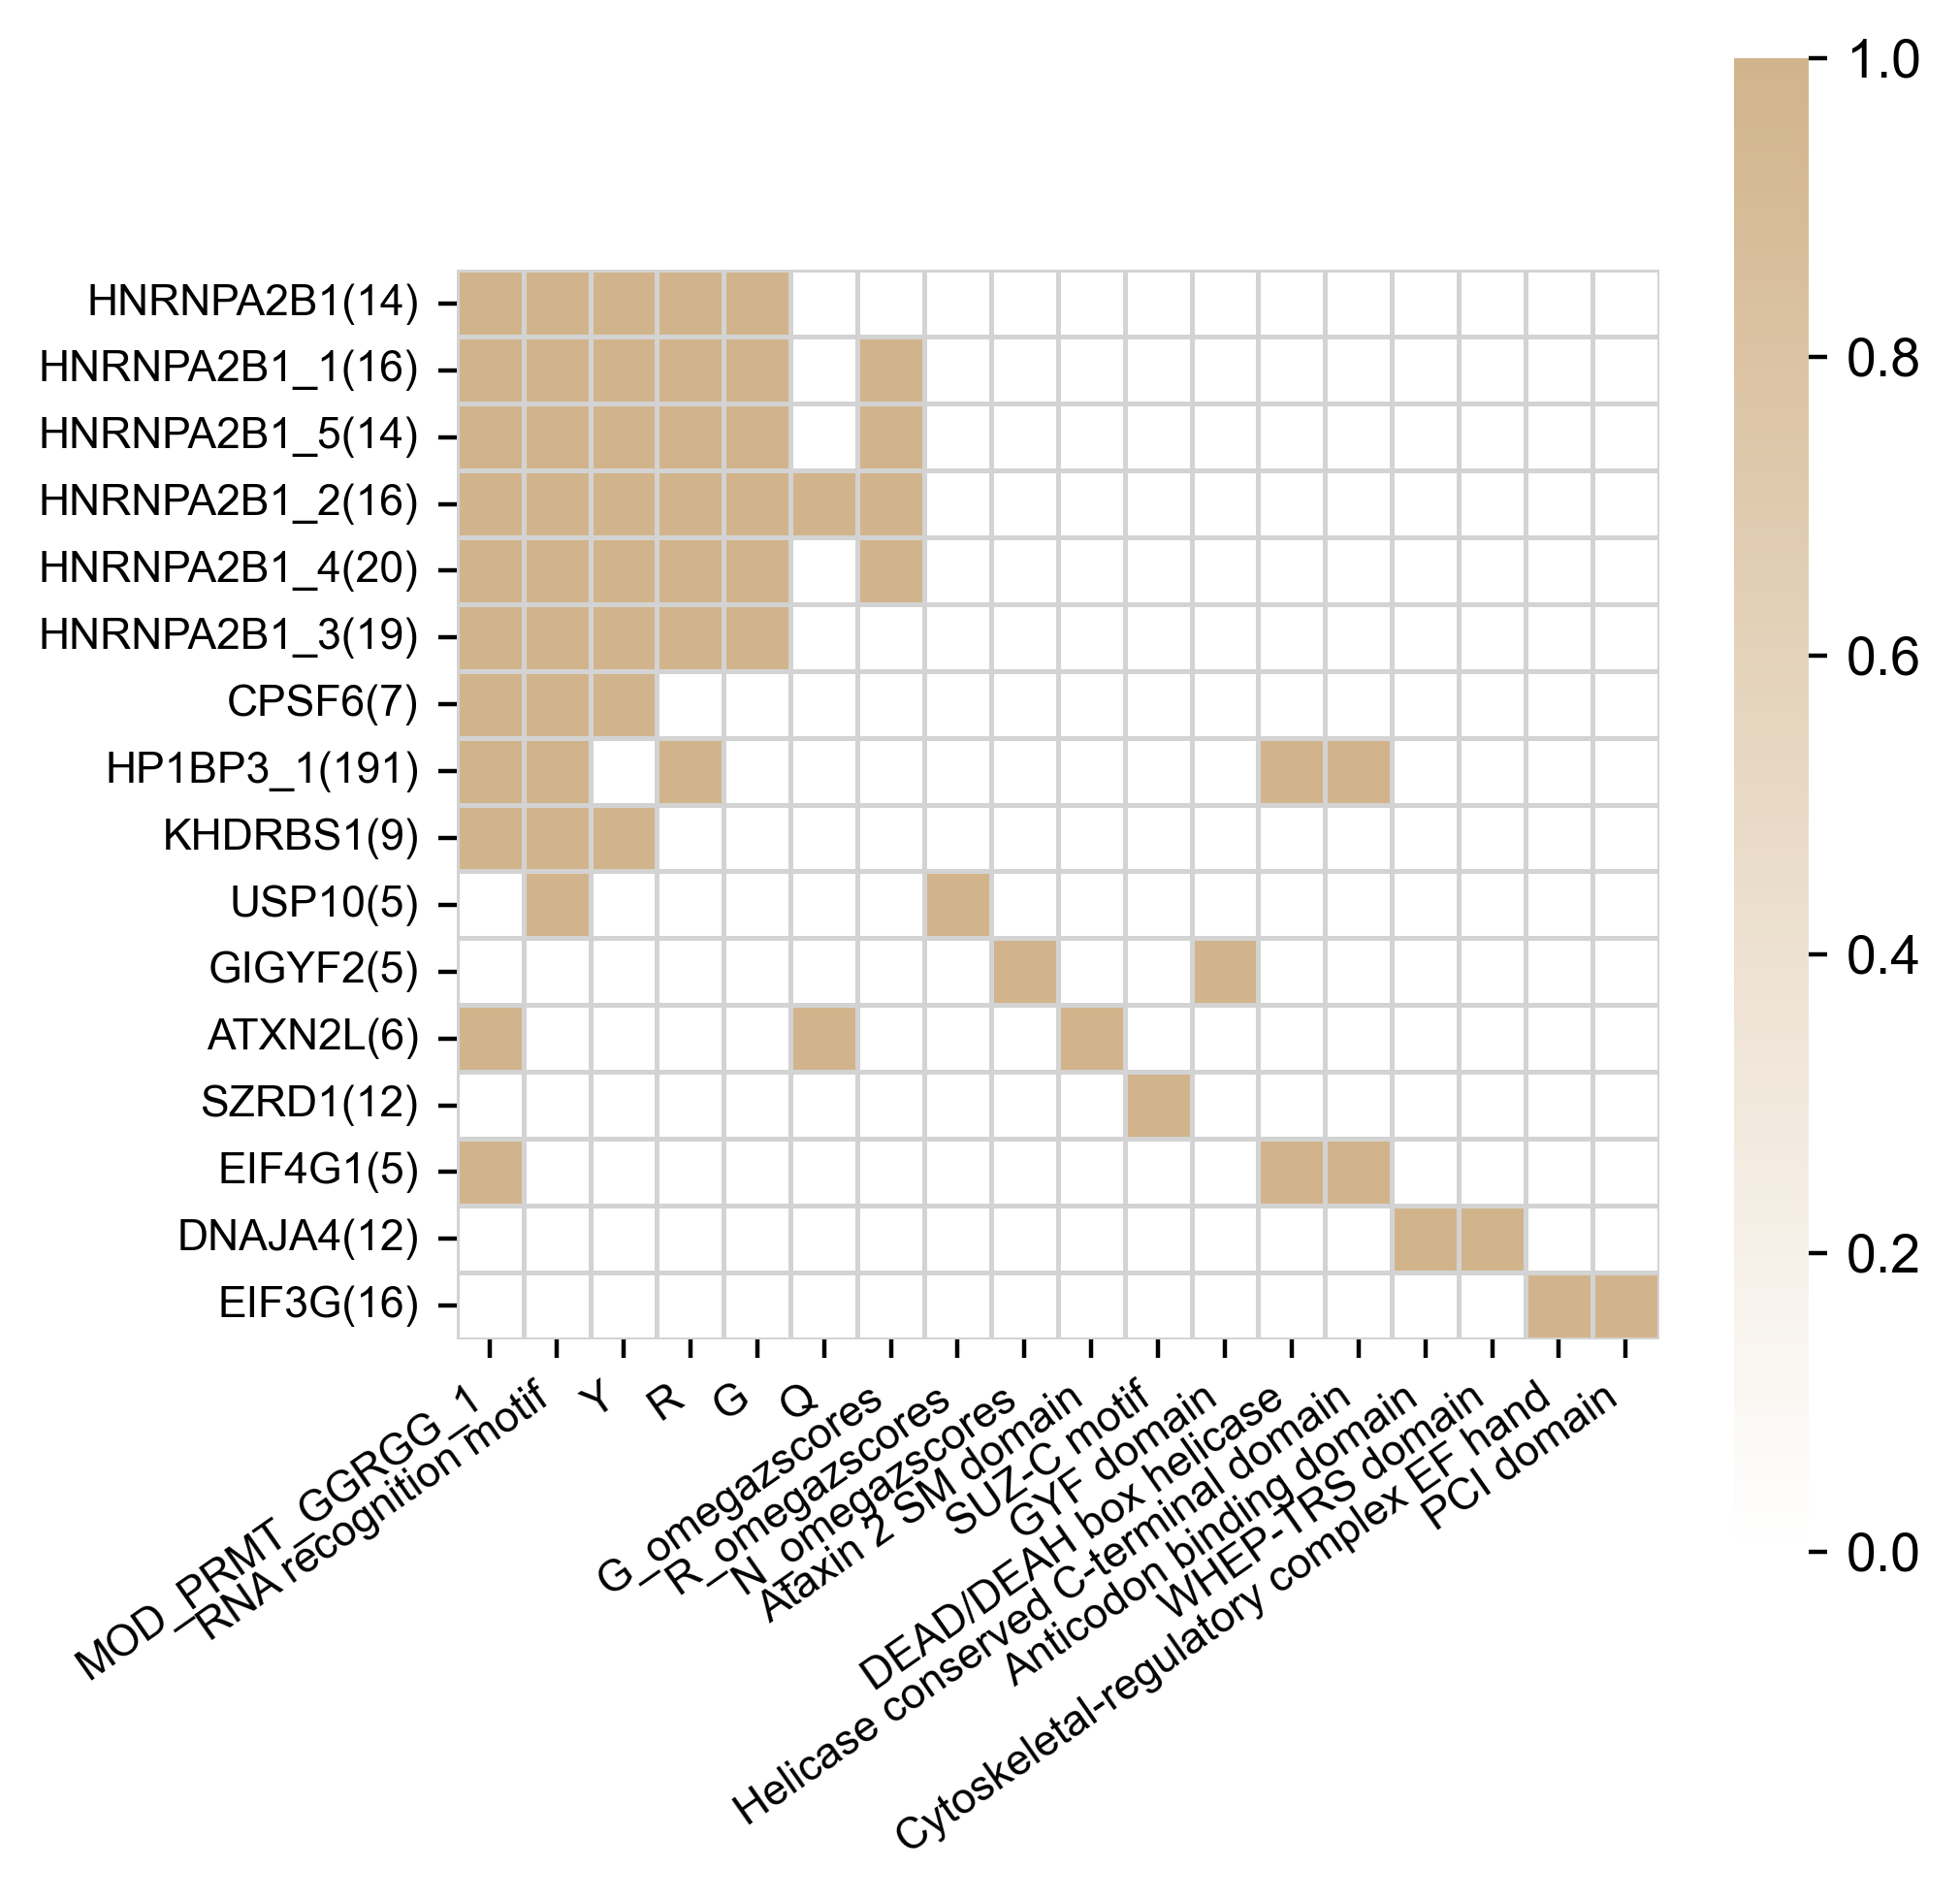

In [818]:
my_colormap1 = LinearSegmentedColormap.from_list("", ["white", "tan"])
plt.figure(figsize=(5, 5),dpi = 400)
plt.subplot(1, 1, 1)


ax = sns.heatmap(heatmap_data.fillna(0), cmap = my_colormap1, 
            vmin=0,vmax = 1,square = True, linewidth=0.6,linecolor='lightgrey'
           )

#ax.tick_params(axis = 'x', pad=5)
#ax.tick_params(axis = 'y', pad=25)
#ax.tick_params(right=True, left=False, top=True, labelright=False, labelbottom=True, labeltop=False,rotation=0)
plt.xticks(rotation=35,ha='right',fontsize=6)
plt.yticks(fontsize=6)
plt.xticks(fontsize=8,fontfamily='Arial')
plt.yticks(fontsize=8,fontfamily='Arial')

plt.savefig(f"E:/Fig6_B.png",bbox_inches = 'tight', dpi=500)

### %Mean Disordered plotting

In [824]:
disordered_datas = pd.read_pickle("D:/lyz所有代码/PhaSepGAT/OtherVisualization/data/human_IDR_sequence_features_202405.pkl")
disordered_datas

uniprot         range  \
0      Q96QF7      (0, 478)   
1      Q13023    (178, 753)   
2      Q13023  (1211, 1627)   
3      Q13023  (1641, 2053)   
4      Q13023  (2100, 2318)   
...       ...           ...   
18980  P32314     (18, 106)   
18981  P32314    (365, 430)   
18982  P09038      (0, 156)   
18983  P39748    (330, 379)   
18984  Q75VX8    (366, 796)   

                                                Sequence  length         A  \
0      MDGCKKELPRLQEPEEDEDCYILNVQSSSDDTSGSSVARRAPKRQA...     479  0.060543   
1      QTDILQAFSEETKEGRLDSLTEVDDSGQLTIKCSQNYLSLDCGITA...     576  0.048611   
2      MSEDALEWDEMDISNKLISLNEESNDLDQELQPVIPSLKLGETSNE...     417  0.026379   
3      IQSPSEQKIKRSVSDITLQSSSQKMSFTGQMSLDIASSINEDSAAS...     413  0.046005   
4      PIQLRKGDFYSYLSLSSHDSDCGEVTNYIEEKSSTPLPLDTTDSGL...     219  0.082192   
...                                                  ...     ...       ...   
18980  EKIAGLSQIYKMGSLPEAVDAARPKATLVDSESADDELTNLNWLHE...      89  0.078652   
18981  GYASQPCAKISEKGQSGKKMRKQTCQEIDEELKEAAGSLLHLAGIR...      66  0.090909   
18982  MVGVGGGDVEDVTPRPGGCQISGRGARGCNGIPGAAAWEAALPRRR...     157  0.133758   
18983  SRQGSTQGRLDDFFKVTGSLSSAKRKEPEPKGSTKKKAKTGAAGKF...      50  0.080000   
18984  ELAEDCASPRRARLCLPAPRAPGLARAPGPLAPAPAGEGDQEYVSP...     431  0.116009   

              C         D         E         F         G  ...  \
0      0.014614  0.229645  0.093946  0.000000  0.025052  ...   
1      0.017361  0.052083  0.092014  0.015625  0.057292  ...   
2      0.016787  0.069544  0.076739  0.026379  0.076739  ...   
3      0.036320  0.089588  0.092010  0.019370  0.038741  ...   
4      0.031963  0.077626  0.114155  0.027397  0.050228  ...   
...         ...       ...       ...       ...       ...  ...   
18980  0.011236  0.078652  0.089888  0.022472  0.067416  ...   
18981  0.045455  0.015152  0.075758  0.000000  0.090909  ...   
18982  0.012739  0.025478  0.038217  0.006369  0.229299  ...   
18983  0.000000  0.040000  0.040000  0.060000  0.140000  ...   
18984  0.018561  0.025522  0.062645  0.025522  0.106729  ...   

       RHK_FWY_deltazscores  STNQCG_IVMALP_deltazscores  \
0                  0.000000                    4.152191   
1                  0.000000                   -0.877788   
2                  0.487486                    0.659230   
3                  0.000000                   -1.867838   
4                  0.000000                   -0.841309   
...                     ...                         ...   
18980             -0.405499                   -0.782241   
18981              0.000000                    1.054799   
18982              0.000000                    1.161301   
18983              0.025019                    0.643538   
18984              0.274173                    1.922586   

       STNQCG_FWY_deltazscores  IVMALP_FWY_deltazscores  WT_pos_block  \
0                     0.000000                 0.000000           5.0   
1                     0.000000                 0.000000           3.0   
2                     0.497874                 1.698903           1.0   
3                     0.000000                 0.000000           1.0   
4                     0.000000                 0.000000           1.0   
...                        ...                      ...           ...   
18980                -1.146178                -0.012795           0.0   
18981                 0.000000                 0.000000           1.0   
18982                 0.000000                 0.000000           1.0   
18983                 2.955504                -0.078698           1.0   
18984                 1.976659                 1.698149           0.0   

       WT_neg_block  WT_all_block  spacer_block_length  Hydropathy  \
0               8.0          13.0                445.0    2.979541   
1               1.0           4.0                189.0    3.711632   
2               3.0           4.0                291.0    3.881775   
3               2.0           3.0                213.0    3.7

In [826]:
heatmap_data_disordered = pd.DataFrame(index=cluster_order,columns=['%Disordered'])
for i in cluster_order:
    proteins = sg_related_feature_enrichment.set_index(['Label']).loc[i,'Members'].split(' ')
    disorder_frac = [np.sum(disordered_datas[disordered_datas['uniprot']==i]['length'].tolist())/disordered_datas[disordered_datas['uniprot']==i]['Full Length'].tolist()[0] if i in disordered_datas['uniprot'].tolist() else 0 for i in proteins]
    heatmap_data_disordered.loc[i,'%Disordered'] = np.mean(disorder_frac)

In [834]:
heatmap_data_disordered['class'] = ['Early']*9+['Invariable']*4+['Late']*3

C:\Users\wqswx\AppData\Local\Temp\ipykernel_14364\859122507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=heatmap_data_disordered,x='class',y='%Disordered',showfliers=False,palette = {'Early':'indigo','Late':'saddlebrown','Invariable':'grey'}, fill=False)


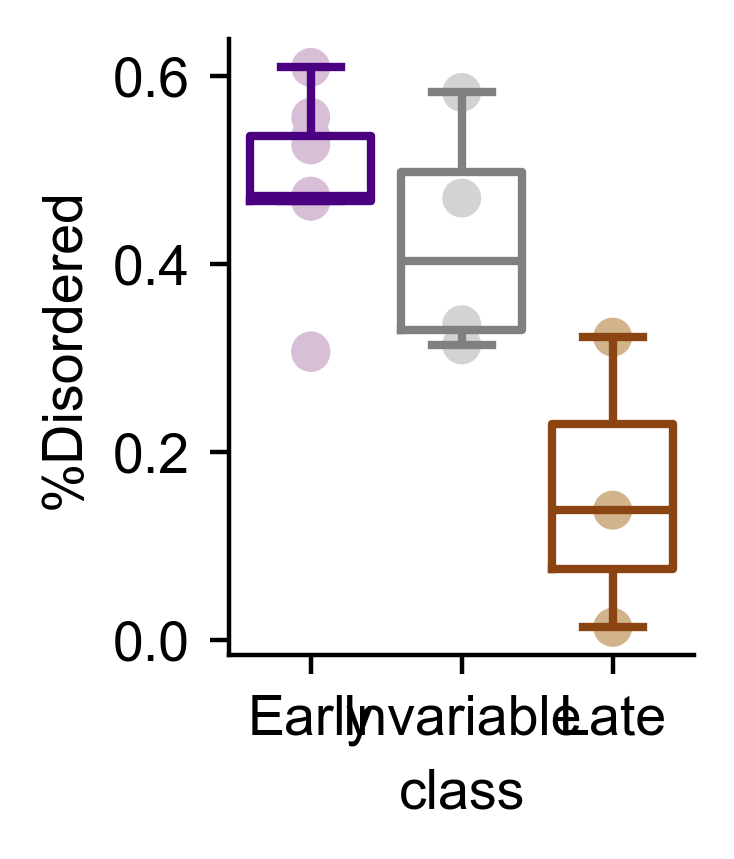

In [835]:
plt.figure(figsize=(1.5, 2),dpi = 400)

sns.boxplot(data=heatmap_data_disordered,x='class',y='%Disordered',showfliers=False,palette = {'Early':'indigo','Late':'saddlebrown','Invariable':'grey'}, fill=False)
plt.scatter(data=heatmap_data_disordered,x='class',y='%Disordered',color = ['thistle']*9+['lightgrey']*4+['tan']*3)

sns.despine()
plt.savefig(f"E:/FigS6_1.png",bbox_inches = 'tight', dpi=500)

In [831]:
stats.mannwhitneyu(heatmap_data_disordered['%Disordered'].tolist()[:9],heatmap_data_disordered['%Disordered'].tolist()[9:12])

MannwhitneyuResult(statistic=13.0, pvalue=1.0)

In [829]:
stats.mannwhitneyu(heatmap_data_disordered['%Disordered'].tolist()[:9],heatmap_data_disordered['%Disordered'].tolist()[12:])

MannwhitneyuResult(statistic=32.0, pvalue=0.033566433566433566)

In [830]:
stats.mannwhitneyu(heatmap_data_disordered['%Disordered'].tolist()[9:12],heatmap_data_disordered['%Disordered'].tolist()[12:])

MannwhitneyuResult(statistic=12.0, pvalue=0.05714285714285714)

## plot of single sequence feature

In [846]:
## Load Library

import random, scipy, math, re, itertools
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
#from Bio.Seq import Seq
import scipy.stats as stats
from collections import Counter
from collections import defaultdict
from matplotlib.colors import rgb2hex, colorConverter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)



# %matplotlib inline
%config InlineBackend.figure_format = 'png'
matplotlib.rcParams['figure.dpi'] = 600

In [847]:
## font_dict

font_title = {
    'family': 'Arial',
    'color': 'black',
    'weight': 'bold',
    'size': 12,
    'style': 'normal'
}

font_label = {
    'family': 'Arial',
    'color': 'black',
    'weight': 'normal',
    'size': 12,
    'style': 'normal'
}

font_legend = {
    'family': 'Arial',
    'color': 'black',
    'weight': 'normal',
    'size': 6,
    'style': 'normal'
}

font_ticks = {
    'family': 'Arial',
    'color': 'black',
    'weight': 'normal',
    'size':  10,
    'style': 'normal'
}
font_ins_ticks = {
    'family': 'Arial',
    'color': 'black',
    'weight': 'normal',
    'size':  8,
    'style': 'normal'
}
font_ticklabels = {
    'family': 'Arial',
    'color': 'black',
    'weight': 'normal',
    'size': 5,
    'style': 'normal'
}

font_anno = {
    'family': 'Arial',
    'color': 'black',
    'weight': 'normal',
    'size': 8,
    'style': 'normal'
}

In [869]:
# RNA recognize motif, domain, IDR: Y,G,R

In [870]:
domain_datas = pd.read_csv("E:/lyz_PhaGAT/代码整理/Fig6/RNA_recognition_motif.csv")
domain_datas

Unnamed: 0 Uniprot DataBase DomainID             DomainName  Start  End  \
0         32481  Q17RY0     Pfam  PF16367  RNA recognition motif    471  560   
1         32482  Q7Z5Q1     Pfam  PF16367  RNA recognition motif    331  420   
2         32483  Q8NE35     Pfam  PF16367  RNA recognition motif    440  529   
3         32484  Q9BZB8     Pfam  PF16367  RNA recognition motif    310  410   
4         32485  Q14011     Pfam  PF00076  RNA recognition motif      8   78   
..          ...     ...      ...      ...                    ...    ...  ...   
314       32795  Q8IUH3     Pfam  PF00076  RNA recognition motif    406  457   
315       32796  Q9BZC1     Pfam  PF00076  RNA recognition motif    442  473   
316       32797  Q8N684     Pfam  PF00076  RNA recognition motif     84  155   
317       32798  O43719     Pfam  PF00076  RNA recognition motif    135  212   
318       32799  P26368     Pfam  PF00076  RNA recognition motif    151  224   

           pvalue  
0    5.200000e-35  
1    6.200000e-35  
2    1.400000e-34  
3    2.700000e-33  
4    9.300000e-23  
..            ...  
314  2.700000e-02  
315  2.800000e-02  
316  3.200000e-02  
317  3.500000e-02  
318  4.200000e-02  

[319 rows x 8 columns]

In [ ]:
motif_datas = pd.read_csv("E:/lyz_PhaGAT/代码整理/Fig6/MOD_PRMT_GGRGG.csv")
motif_datas

Unnamed: 0    motif_id      motif_alt_id sequence_name   start    stop  \
0           4141  ELME000447  MOD_PRMT_GGRGG_1        Q6PKC3     5.0     9.0   
1           4142  ELME000447  MOD_PRMT_GGRGG_1        Q9NY12     6.0    10.0   
2           4143  ELME000447  MOD_PRMT_GGRGG_1        Q15306     6.0    10.0   
3           4144  ELME000447  MOD_PRMT_GGRGG_1        Q9C073     7.0    11.0   
4           4145  ELME000447  MOD_PRMT_GGRGG_1        Q13191    11.0    15.0   
...          ...         ...               ...           ...     ...     ...   
4556      240577  ELME000447  MOD_PRMT_GGRGG_1        Q15911  3521.0  3525.0   
4557      240578  ELME000447  MOD_PRMT_GGRGG_1        Q15911  3522.0  3526.0   
4558      240579  ELME000447  MOD_PRMT_GGRGG_1        Q15911  3523.0  3527.0   
4559      240580  ELME000447  MOD_PRMT_GGRGG_1        Q15751  3765.0  3769.0   
4560      240581  ELME000447  MOD_PRMT_GGRGG_1        Q4G0P3  4978.0  4982.0   

     strand     score   p-value  q-value matched_sequence  
0         +  19.61730  0.000001   0.0913            GGRGG  
1         +  19.61730  0.000001   0.0913            GGRGG  
2         +  19.61730  0.000001   0.0913            GGRGG  
3         +  19.61730  0.000001   0.0913            GGRGG  
4         +  19.61730  0.000001   0.0913            GGRGG  
...     ...       ...       ...      ...              ...  
4556      +   7.44444  0.000087   0.2160            GGGGG  
4557      +   7.44444  0.000087   0.2160            GGGGG  
4558      +   7.44444  0.000087   0.2160            GGGGG  
4559      +   7.44444  0.000087   0.2160            GGLGG  
4560      +   7.44444  0.000087   0.2160            GGQGG  

[4561 rows x 11 columns]

In [851]:
aa_feature_datas = pd.read_pickle("D:/lyz所有代码/PhaSepGAT/OtherVisualization/data/human_IDR_sequence_features_202405.pkl")
aa_feature_datas

uniprot         range  \
0      Q96QF7      (0, 478)   
1      Q13023    (178, 753)   
2      Q13023  (1211, 1627)   
3      Q13023  (1641, 2053)   
4      Q13023  (2100, 2318)   
...       ...           ...   
18980  P32314     (18, 106)   
18981  P32314    (365, 430)   
18982  P09038      (0, 156)   
18983  P39748    (330, 379)   
18984  Q75VX8    (366, 796)   

                                                Sequence  length         A  \
0      MDGCKKELPRLQEPEEDEDCYILNVQSSSDDTSGSSVARRAPKRQA...     479  0.060543   
1      QTDILQAFSEETKEGRLDSLTEVDDSGQLTIKCSQNYLSLDCGITA...     576  0.048611   
2      MSEDALEWDEMDISNKLISLNEESNDLDQELQPVIPSLKLGETSNE...     417  0.026379   
3      IQSPSEQKIKRSVSDITLQSSSQKMSFTGQMSLDIASSINEDSAAS...     413  0.046005   
4      PIQLRKGDFYSYLSLSSHDSDCGEVTNYIEEKSSTPLPLDTTDSGL...     219  0.082192   
...                                                  ...     ...       ...   
18980  EKIAGLSQIYKMGSLPEAVDAARPKATLVDSESADDELTNLNWLHE...      89  0.078652   
18981  GYASQPCAKISEKGQSGKKMRKQTCQEIDEELKEAAGSLLHLAGIR...      66  0.090909   
18982  MVGVGGGDVEDVTPRPGGCQISGRGARGCNGIPGAAAWEAALPRRR...     157  0.133758   
18983  SRQGSTQGRLDDFFKVTGSLSSAKRKEPEPKGSTKKKAKTGAAGKF...      50  0.080000   
18984  ELAEDCASPRRARLCLPAPRAPGLARAPGPLAPAPAGEGDQEYVSP...     431  0.116009   

              C         D         E         F         G  ...  \
0      0.014614  0.229645  0.093946  0.000000  0.025052  ...   
1      0.017361  0.052083  0.092014  0.015625  0.057292  ...   
2      0.016787  0.069544  0.076739  0.026379  0.076739  ...   
3      0.036320  0.089588  0.092010  0.019370  0.038741  ...   
4      0.031963  0.077626  0.114155  0.027397  0.050228  ...   
...         ...       ...       ...       ...       ...  ...   
18980  0.011236  0.078652  0.089888  0.022472  0.067416  ...   
18981  0.045455  0.015152  0.075758  0.000000  0.090909  ...   
18982  0.012739  0.025478  0.038217  0.006369  0.229299  ...   
18983  0.000000  0.040000  0.040000  0.060000  0.140000  ...   
18984  0.018561  0.025522  0.062645  0.025522  0.106729  ...   

       RHK_FWY_deltazscores  STNQCG_IVMALP_deltazscores  \
0                  0.000000                    4.152191   
1                  0.000000                   -0.877788   
2                  0.487486                    0.659230   
3                  0.000000                   -1.867838   
4                  0.000000                   -0.841309   
...                     ...                         ...   
18980             -0.405499                   -0.782241   
18981              0.000000                    1.054799   
18982              0.000000                    1.161301   
18983              0.025019                    0.643538   
18984              0.274173                    1.922586   

       STNQCG_FWY_deltazscores  IVMALP_FWY_deltazscores  WT_pos_block  \
0                     0.000000                 0.000000           5.0   
1                     0.000000                 0.000000           3.0   
2                     0.497874                 1.698903           1.0   
3                     0.000000                 0.000000           1.0   
4                     0.000000                 0.000000           1.0   
...                        ...                      ...           ...   
18980                -1.146178                -0.012795           0.0   
18981                 0.000000                 0.000000           1.0   
18982                 0.000000                 0.000000           1.0   
18983                 2.955504                -0.078698           1.0   
18984                 1.976659                 1.698149           0.0   

       WT_neg_block  WT_all_block  spacer_block_length  Hydropathy  \
0               8.0          13.0                445.0    2.979541   
1               1.0           4.0                189.0    3.711632   
2               3.0           4.0                291.0    3.881775   
3               2.0           3.0                213.0    3.7

In [856]:
aa_feature_datas['range'][0]

'(0, 478)'

In [905]:
plot_name = ['Q92804','P35637','P31942','P55795','Q13151','Q32P51','P22626','B1ATL7','P51991','P52597','P52272','Q86Y13','P31943','Q99990']

In [907]:
plot_name = ['Q13283','Q14694']

In [909]:
plot_name = ['Q04637','O60516']

In [911]:
plot_name = ['Q9UN86','Q5TZA2']

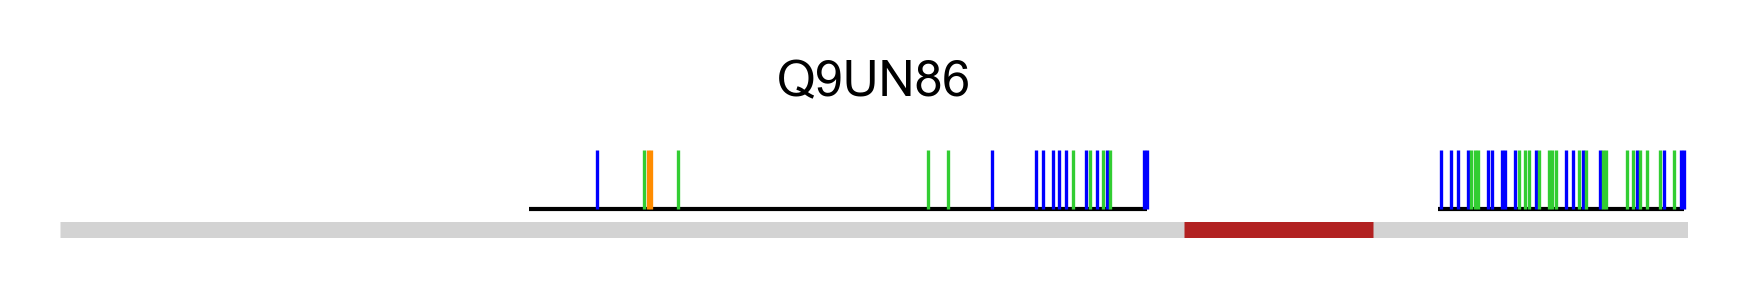

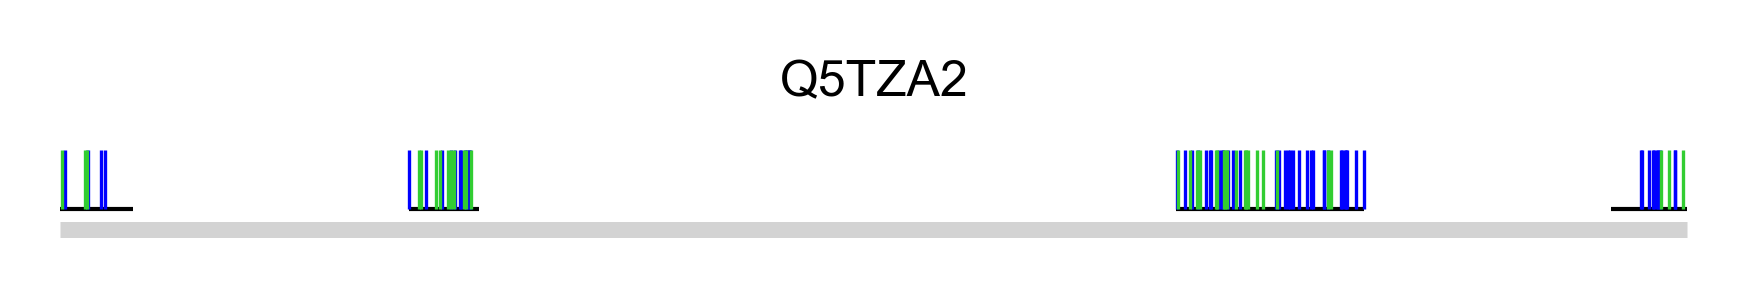

In [912]:
for name in plot_name:
    protein_length = aa_feature_datas[aa_feature_datas['uniprot']==name]['Full Length'].tolist()[0]
    motif_ranges = [[motif_datas.loc[i,'start'],motif_datas.loc[i,'stop']] for i in motif_datas[motif_datas['sequence_name']==name].index]
    domain_ranges = [[domain_datas.loc[i,'Start'],domain_datas.loc[i,'End']] for i in domain_datas[domain_datas['Uniprot']==name].index]
    
    
    fig, ax = plt.subplots(figsize=(3.5, 0.2))

    ax.set_xlim(0,protein_length)
    ax.hlines(0, 0, protein_length, linewidth=3, linestyle='-', color='lightgrey')

    #plot of domain
    for m in range(len(domain_ranges)):
        pos_region = domain_ranges[m]
        ax.hlines(0, pos_region[0], pos_region[1], linewidth=3, linestyle='-', color='firebrick')

    #plot of RRM
    for m in range(len(motif_ranges)):
        pos_region = motif_ranges[m]
        ax.hlines(0, pos_region[0], pos_region[1], linewidth=3, linestyle='-', color='lightcoral')
    plt.xticks([])
    ax.set_xticks([])
    plt.yticks([])
    ax.set_yticks([])

    plt.title(name,fontsize=6)


    #plot of amino acid
    idr_region = [[int(m) for m in i[1:-1].split(', ')] for i in aa_feature_datas[aa_feature_datas['uniprot']==name]['range'].tolist()]
    idr_seqs = aa_feature_datas[aa_feature_datas['uniprot']==name]['Sequence'].tolist()


    for t in range(len(idr_region)):
        rs = idr_region[t]
        ax.hlines(0.06, rs[0], rs[1], linewidth=0.5, linestyle='-', color='black')
        seq = idr_seqs[t]

        Y_pos = [i+rs[0] for i in range(len(seq)) if seq[i] =='Y']
        R_pos = [i+rs[0] for i in range(len(seq)) if seq[i] =='R']
        G_pos = [i+rs[0] for i in range(len(seq)) if seq[i] =='G']

        ax.vlines(Y_pos, 0.06, 0.2, linewidth=0.4, linestyle='-', color='darkorange')
        ax.vlines(R_pos, 0.06, 0.2, linewidth=0.4, linestyle='-', color='blue')
        ax.vlines(G_pos, 0.06, 0.2, linewidth=0.4, linestyle='-', color='limegreen')



    sns.despine(bottom=True,top=True,left=True,right=True)

    fig.savefig(f'E:/lyz_PhaGAT/代码整理/Fig6/new_fig/{name}.png',format="png",bbox_inches='tight',dpi=500)   

In [881]:
domain_ranges

[[114, 172], [23, 88]]